# <b> Capstone Project - The Battle of Neighborhoods (Week 1-2) </b>
<br>
<br>
<br>
This notebook is part of a Capstone Project - The Battle of Neighborhoods, part of the IBM Data Science Professional Certificate. It contains the following sections:<br>
<br>
    (week-1)<br>
    - Business Problem section: describes the problem and its background.<br>
    - Data section: describes the data and how it will be used to solve the problem.<br>
<br>    
    (week-2)<br>
    - Methodology section: describes the exploratory data analysis we performed.<br>
    - Result and discussion section: details the results of our analysis.<br>
    - Conclusion section: summarizes our findings and highlights main conclusions.<br>
<br>
<br>

### <b>Business Problem section </b><br>
<b> Favourable locations for a new café in busy London.</b><br>
<br>
Experts agree that Britain now has one of the most vibrant coffee cultures in the world, which is showcased by the constant increase year after year of the number of the London Coffee Festival attendees - more than 31000 people attended last year edition (2019).<br>
Knowing that UK residents consume 95 million cups of coffee per day and their love for the black elixir is growing, a new entrepreneur is looking at opening an independent café in London where he can connect with his customers and share his passion for the coffee culture. The main challenge is the strong competition - the number of cafés more than doubled in UK since 2010. In fact, London's West End is now home to more Starbucks' branches than the whole of Australia.<br>
<br>
Beside the menu and the ambiance, the location of a café is fundamental to its success. Many cafés are positioned in busy streets, but this is not the only criteria especially when we are considering a crowded city like London. Most people pick a coffee shop for its convenience - in the centre, close to offices or in an area knowing for good cafés. <br>
<br>
The entrepreneur is asking if we can help him identifying the best neighborhoods to open a new café, using a data-driven approach - which will be the topic of this project.<br>
To solve this problem, we will identify London neighborhoods, check the numbers of cafés in each one of them. We will then recommend the best neighborhoods (most profitable) according to the overall cafés rating in these areas and how they are perceived by customers, taking in consideration the number of existent cafés.<br>
<br>
In a wider picture, this problem is targeting all entrepreneurs who are thinking of opening a new café in London, or even for just the café lovers to check the neighborhoods with the best coffee shops rating.
<br>
<br>
<br>

### <b>Data section</b><br>
<br>
The Data Science Workflow used for this project is:<br>
<br>
    - Outline the initial data that is required.<br>
    - Obtain the data:<br>
        ○ Find suitable sources for London neighborhoods<br>
        ○ Explore the data<br>
    - Initial data wrangling and cleaning.<br>
    - Data analysis and Location data:<br>
        ○ Foursquare location data will be leveraged to explore cafés in London neighborhoods.<br>
        ○ Data manipulation and analysis.<br>
    - Visualization of the data.<br>
<br>
<br>
London city is actually divided in 38 boroughs. But in order to provide a good results for our entrepreneur, we decided to analyse the data of London neighborhoods. <br>
Ideally, the data should include list of boroughs, neighborhoods, latitude and longitude for each neighborhood, list of cafés/coffee shops per neighborhood and the tips/recommendation per café. We also considered looking at the population per borough, which may help us in the end of the project to select the best locations for the new café.<br>
<br>
To find and get the needed data, we had to to search in different sources, then wrangle and clean it.<br>
London boroughs and neighborhoods data is available in the Wikipedia page - https://en.wikipedia.org/wiki/List_of_areas_of_London, we then used the Geopy library in Python to get the latitude and longitude of each neighborhood.<br>
London population per borough data is available in the website gov.uk, in a CSV file format (file name: "Population borough London").<br>
Data related to available cafés and coffee shops, their locations and their details, will be obtained via the Foursquare API via the Request library in Python.<br>
<br>

#### Install the required packages
To be able to collect the data and analyze it, we will need to install the following packages:

In [1]:
!conda install -c conda-forge --no-deps wikipedia --yes   # installing Wikipedia package 

# installing BeautifulSoup and lxml packages
!conda install -c conda-forge --no-deps beautifulsoup4 --yes   
!conda install -c conda-forge --no-deps lxml --yes  

# installing Geocoder and related packages
!conda install -c conda-forge --no-deps geocoder --yes    
!conda install -c conda-forge --no-deps ratelim --yes   
!conda install -c conda-forge --no-deps click --yes   
!conda install -c conda-forge --no-deps altair --yes    
!conda install -c conda-forge --no-deps vincent --yes   

!conda install -c conda-forge geopy=1.21.0 --yes   # installing Geopy package 

!conda install -c conda-forge --no-deps folium=0.10.1 --yes   # installing Folium package 

!conda install -c conda-forge --no-deps googlemaps --yes   # installing googlemaps package

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          13 KB

The following NEW packages will be INSTALLED:

  wikipedia          conda-forge/noarch::wikipedia-1.4.0-py_2



wikipedia-1.4.0      | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::wikipedia==1.4.0=py_2
done

## Package Plan 

#### Get the data from Wikipedia
As mentioned before, the first part of our data (London neighborhoods and boroughs) is available in the Wikipedia page "https://en.wikipedia.org/wiki/List_of_areas_of_London". <br>
We start by importing the required libraries then use BeautifulSoup to get the data - this Python library generates duplicate lines in the resulted dataframe, so some cleaning and wrangling will be needed.

In [2]:
import requests
import pandas as pd
import random  # library for random number generation

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from urllib.request import urlopen

url = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
parsed_table = []

def get_wikipedia_data(u):
    wiki_url = requests.get(u).text
    soup = BeautifulSoup(wiki_url, 'html5lib')
    rows = soup.find('table', class_='wikitable sortable').find_all('tr')
    
    for row in rows:
        children = row.findChildren(recursive=False)
        row_text = []
        for child in children:
            clean_text = child.text
            clean_text = clean_text.split('&#91;')[0]     # This is to discard reference/citation links
            clean_text = clean_text.split('&#160;')[-1]   # This is to clean the header row of the sort icons
            clean_text = clean_text.strip()
            row_text.append(clean_text)
            parsed_table.append(row_text)
   
    return parsed_table

if __name__=="__main__":
    print ('this is the data:')
    tor_list = get_wikipedia_data(url) 
    #for row in tor_df:
    #    print ('|'.join(row))

# Create our dataframe from the html text
london_neighborhood_df = pd.DataFrame (tor_list,columns=['Location', 'London borough', 'Post town', 'Postcode district', 'Dial code', 'OS grid ref'])

# To eliminate all duplicate rows
london_neighborhood_df = london_neighborhood_df.drop_duplicates()

# To drop first row in the dataframe, since it's listing the columns' names
london_neighborhood_df.drop(london_neighborhood_df.index[:1], inplace=True)

london_neighborhood_df.head(10)

this is the data:


,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
6,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
12,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
18,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
24,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
30,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
36,Aldborough Hatch,Redbridge[9],ILFORD,IG2,020,TQ455895
42,Aldgate,City[10],LONDON,EC3,020,TQ334813
48,Aldwych,Westminster[10],LONDON,WC2,020,TQ307810
54,Alperton,Brent[11],WEMBLEY,HA0,020,TQ185835
60,Anerley,Bromley[11],LONDON,SE20,020,TQ345695


<br> We will then play with the data and clean the dataframe to get our final list of London neighborhoods and boroughs, where every neighborhood is unique and listed with its allocated borough.

In [3]:
# Cleaning our data

# Create a new dataframe with only the needed columns
london_df = london_neighborhood_df[['Location', 'London borough']].copy()

# Rename the columns
london_df.rename(columns = {'Location':'Neighborhood', 'London borough':'Borough'}, inplace = True) 

# Remove rows with a neighborhood that is "Not assigned".
london_df.drop(london_df[london_df['Neighborhood']=="Not assigned"].index,axis=0, inplace=True)

# If a Neighborhood is listed more than once, regroup all the boroughs in one row and seperate them with ','
london_df = london_df.groupby("Neighborhood").agg(lambda x:','.join(set(x)))

# If a neighborhood has more than one borough, only keep the first borough
london_df['Borough'] = london_df['Borough'].str.split(',').str[0]

# Some Boroughs have a number in the end (related to Wikipedia page), so we removed this
london_df['Borough'] = london_df['Borough'].str.split('[').str[0]

# We are replacing the borough "city" by "city of London"
london_df['Borough'] = london_df['Borough'].str.replace('City','City of London')

london_df.reset_index(level=0, inplace=True)

print(london_df.shape)
london_df.head(10)

(527, 2)


,Neighborhood,Borough
0,Abbey Wood,Bexley
1,Acton,Ealing
2,Addington,Croydon
3,Addiscombe,Croydon
4,Albany Park,Bexley
5,Aldborough Hatch,Redbridge
6,Aldgate,City of London
7,Aldwych,Westminster
8,Alperton,Brent
9,Anerley,Bromley


In [4]:
# Let's check how many neighborhoods and boroughs we have

print('There are {} uniques Neighborhoods.'.format(len(london_df['Neighborhood'].unique())))
print('There are {} uniques Boroughs.'.format(len(london_df['Borough'].unique())))

There are 527 uniques Neighborhoods.
There are 38 uniques Boroughs.


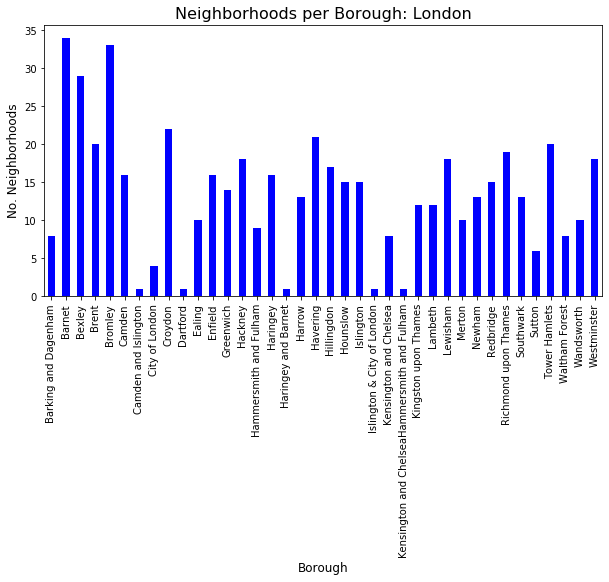

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

london_df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color="blue")
plt.title('Neighborhoods per Borough: London', fontsize = 16)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('No. Neighborhoods',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()


#### Get latitude and longitude coordinates
Next step will be get the latitude and longitude for each neighborhood. For this, We will use the Python library Geopy.<br>
This library is not always reliable and we faced some challenges using the code and getting the coordinates of all the neighborhoods. In some cases, the code returned a "service not available" error if we exceeded a certain number of requests in one time. As a workaround, you can split your data in multiple sections, and execute the code for each one of them. <br>
After executing the code, some neighborhoods were missing their latitude and longitude coordinations. The number was very low (10) so we decided to just delete these rows.

In [5]:
from geopy.geocoders import Nominatim

london_df['Latitude'] = ""
london_df['Longitude'] = ""
geolocator = Nominatim(user_agent="capstone_project")

for index, row in london_df.iterrows():
    #if index<44:  ## this can be used to split your data
    site = row['Neighborhood']+", London, UK"
    location = geolocator.geocode(site)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'N/A'
        longitude = 'N/A'
    row['Latitude'] = latitude
    row['Longitude'] = longitude

In [17]:
# Remove rows with a latitude or longitude that is "N/A" or empty.
london_df.drop(london_df[london_df['Latitude']=="N/A"].index,axis=0, inplace=True)
london_df.drop(london_df[london_df['Latitude']==""].index,axis=0, inplace=True)
london_df.drop(london_df[london_df['Longitude']=="N/A"].index,axis=0, inplace=True)
london_df.drop(london_df[london_df['Longitude']==""].index,axis=0, inplace=True)

print(london_df.shape)
london_df.tail(20)

(517, 4)


,Neighborhood,Borough,Latitude,Longitude
506,Westcombe Park,Greenwich,51.4842,0.0188787
507,Westminster,Westminster,51.5014,-0.12493
508,Whetstone,Barnet,51.6302,-0.174884
509,White City,Hammersmith and Fulham,51.5119,-0.224236
510,Whitechapel,Tower Hamlets,51.5186,-0.0620807
511,Whitton,Richmond upon Thames,51.4512,-0.357976
513,Willesden,Brent,51.5466,-0.235866
514,Wimbledon,Merton,51.4215,-0.206403
515,Winchmore Hill,Enfield,51.6334,-0.103362
516,Wood Green,Haringey,51.596,-0.109147


<br><u>Remarque:</u>
It's always a good practice to save your dataframe after using a Python library such as Geopy.

In [3]:
# Save the information so far to a .csv file 
# london_df.to_csv('london_df.csv')
london_df = pd.read_csv('london_df.csv')   ## use this commend to read the saved CSV file

#### Get the population per borough
Based on the results we will end-up having, we will may need to know the population by borough to be able to select the best neighborhoods to open a café. This information is already available in the website www.gov.uk (https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough). <br>
After understanding the data in the CSV file, we selected the needed columns and saved this as a second dataframe.

In [4]:
import csv

!wget -q -O 'population_borough_london.csv' https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/77e9257d-ad9d-47aa-aeed-59a00741f301/housing-density-borough.csv
lp_df = pd.read_csv('population_borough_london.csv')

# Select the year 2019
lp_df = lp_df[lp_df.Year == 2019]

# Create a new dataframe with only the needed columns
london_population_df = lp_df[['Name', 'Population']].copy()

# Rename the columns
london_population_df.rename(columns = {'Name':'Borough'}, inplace = True) 

# sorting the boroughs in a descending way and removing Greater, Outer and Inner london areas (not boroughs)
london_population_df.sort_values(by='Population', ascending=False, inplace=True)
london_population_df = london_population_df.iloc[3:]

print(london_population_df.shape)
london_population_df.head(36)

(33, 2)


,Borough,Population
124,Barnet,402363
384,Croydon,396548
1268,Newham,359470
436,Ealing,354184
228,Brent,340710
488,Enfield,339480
1112,Lambeth,338028
280,Bromley,334292
1632,Wandsworth,328828
1424,Southwark,327271


<br>
We now have important the relevant data for London neighborhoods and boroughs, and have constructed our dataframe. <br>
Nest phase, we will use the Foursquare API to get info on cafés in each neighborhood  <br><br><br>

### <b>Methodology section</b><br>
<br>
As stated above, we will now use the Foursquare API to get details about our neighborhoods and extra info on available cafés, which will help us to identify busy areas and understand customers behavior.<br>
<br>
To be able to use the Foursquare API, you'll need to have a developer profile and use your Foursquare credentials (client ID and client secret) - please see below. <br>
Additionally, we will need to specify the version of the date (the date), the limit and the radius, which are needed for our requests.
<br>

In [8]:
# Define details for Foursquare requests

CLIENT_ID = 'IWKKM4IYZLOOAHTBBCDWQHYRDGAOVAHRX1G20BPEFARUHJA0' # your Foursquare ID
CLIENT_SECRET = 'XZOV4W1BA5R1RKCD4SKMGXOXA54A3PNXESUB0XNL5B444Q4Y' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version
radius = 350
limit = 80

<br>Let's use the functions defined in previous labs, which will allow us to get the nearby venues per neighborhood and the details for each neighborhood.<br>
You should be aware of the limited number of request that you can execute per day (this will depends on your Foursquare profile and subscription), so it's important that you save your dataframe in a CSV file after you execute your request. <br>

In [20]:
# Functions to be used

def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues) 

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
#    print(results['response'].keys())
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [ ]:
# Get the nearby venues for each neighborhood

venues = getNearbyVenues(names=london_df['Neighborhood'],
                         latitudes=london_df['Latitude'],
                         longitudes=london_df['Longitude'])

venues.head()

In [10]:
# check how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

# check how many venues returned by neighborhood and classify then in descendant way
venues.groupby('Neighborhood').count().sort_values(['Venue'], ascending=False)

There are 375 uniques categories.


,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,,
Wimbledon,80,80,80,80,80,80,80,80
Brompton,80,80,80,80,80,80,80,80
Covent Garden,80,80,80,80,80,80,80,80
Chinatown,80,80,80,80,80,80,80,80
Richmond,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...
Hazelwood,1,1,1,1,1,1,1,1
Shooter's Hill,1,1,1,1,1,1,1,1
Cowley,1,1,1,1,1,1,1,1


In [5]:
# Save the information so far to a .csv file due to limited calls on FourSquare
#venues.to_csv('cafe_venues_london.csv')
venues = pd.read_csv('cafe_venues_london.csv')
venues.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Abbey Wood,51.487621,0.114050,4bf181d61f17ef3bfcf59bc8,Co-op Food,51.487650,0.113490,Grocery Store
1,1,Abbey Wood,51.487621,0.114050,4bd315449854d13af6cffc4d,Bostal Gardens,51.486670,0.110462,Playground
2,2,Acton,51.508140,-0.273261,5658b22838fae7c08d97dc51,London Star Hotel,51.509624,-0.272456,Hotel
3,3,Acton,51.508140,-0.273261,4bc1c0b7920eb7130d191b2c,Dragonfly Brewery at George & Dragon,51.507378,-0.271702,Brewery
4,4,Acton,51.508140,-0.273261,527c07e711d255a8e45a3856,The Aeronaut,51.508376,-0.275216,Pub


<br>
The generated results present info about all the venues in our neighborhoods. By checking all the types of categories returned by our Foursquare request, we are interested in "café" and "coffee shop" categories for this project. All other food places serving cafés will not be considered as direct competitors, and then can be ignored in our analysis. <br><br>
Let's check how many cafés we have in our dataframe and see how they are distributed (per borough). <br><br>

In [25]:
# Let's see what's the name of venue used to refer to a café
venues['Venue Category'].unique()

array(['Grocery Store', 'Playground', 'Hotel', 'Brewery', 'Pub',
       'Creperie', 'Fast Food Restaurant', 'Gym / Fitness Center',
       'Sandwich Place', 'Coffee Shop', 'Chinese Restaurant',
       'Cocktail Bar', 'Café', 'Shopping Mall', 'Japanese Restaurant',
       'Gas Station', 'English Restaurant', 'Bus Station', 'Tram Station',
       'Bakery', 'Diner', 'Park', 'Train Station', 'Indian Restaurant',
       'Pizza Place', 'Argentinian Restaurant', 'Italian Restaurant',
       'Lounge', 'Vietnamese Restaurant', 'Beer Bar', 'Mini Golf',
       'Salad Place', 'Steakhouse', 'Szechuan Restaurant',
       'Street Food Gathering', 'Thai Restaurant', 'Restaurant',
       'Middle Eastern Restaurant', 'American Restaurant',
       'Seafood Restaurant', 'Hotel Bar', 'Sushi Restaurant',
       'Greek Restaurant', 'Gym', 'Bar', 'Spanish Restaurant',
       'Art Gallery', 'French Restaurant', 'Tea Room', 'Historic Site',
       'History Museum', 'Art Museum', 'Theater', 'Event Space',
      

In [6]:
# check the neighborhoods with cafés
words=['Café', 'Coffee Shop']
london_cafe_df = venues[venues['Venue Category'].str.contains('|'.join(words))] 

# check if some venues are double listed and remove them
london_cafe_df = london_cafe_df.drop_duplicates(subset=['Venue','Venue Latitude','Venue Longitude'], keep='first')

print(london_cafe_df.shape)
london_cafe_df.head(20)

(925, 9)


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
11,11,Acton,51.508140,-0.273261,517d323fe4b0b4d24c007345,Costa Coffee,51.506879,-0.269368,Coffee Shop
17,17,Acton,51.508140,-0.273261,4d971048a2c654815e9dce53,Frank's Cafe,51.508083,-0.270300,Café
24,24,Addiscombe,51.379692,-0.074282,533fea17498e1f39b6eab646,The Tram Stop,51.380188,-0.073378,Café
44,44,Aldgate,51.514248,-0.075719,4f70a772e4b0f375fc669005,The Association,51.513733,-0.079132,Coffee Shop
49,49,Aldgate,51.514248,-0.075719,4cb1d779562d224b09ec2188,Fazenda,51.516169,-0.077414,Coffee Shop
59,59,Aldgate,51.514248,-0.075719,59f97d45acb00b6e13f7d430,Black Sheep Coffee,51.513990,-0.075459,Coffee Shop
68,68,Aldgate,51.514248,-0.075719,58af36849435a903b9148728,Whitechapel Grind,51.514409,-0.072834,Coffee Shop
73,73,Aldgate,51.514248,-0.075719,56bd9566498e17276fd1943c,Nude Espresso,51.516894,-0.075482,Coffee Shop
78,78,Aldgate,51.514248,-0.075719,5548bf3e498e5a453a75bb45,Black Sheep Coffee,51.515066,-0.072126,Coffee Shop
79,79,Aldgate,51.514248,-0.075719,56cf0e4c498e3a5a5e7326c3,Notes Coffee Roaster & Wine Bar,51.514643,-0.080671,Coffee Shop


In [7]:
# add the borough to the datafram
borough_df = london_df[["Neighborhood", "Borough"]].copy()
london_cafe_df = london_cafe_df.merge(borough_df, on='Neighborhood', how='left')

# move column Borough to the first column
fixed_columns = [london_cafe_df.columns[-1]] + list(london_cafe_df.columns[:-1])
london_cafe_df = london_cafe_df[fixed_columns]

print(london_cafe_df.shape)
london_cafe_df.head(10)

(925, 10)


,Borough,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ealing,11,Acton,51.508140,-0.273261,517d323fe4b0b4d24c007345,Costa Coffee,51.506879,-0.269368,Coffee Shop
1,Ealing,17,Acton,51.508140,-0.273261,4d971048a2c654815e9dce53,Frank's Cafe,51.508083,-0.270300,Café
2,Croydon,24,Addiscombe,51.379692,-0.074282,533fea17498e1f39b6eab646,The Tram Stop,51.380188,-0.073378,Café
3,City of London,44,Aldgate,51.514248,-0.075719,4f70a772e4b0f375fc669005,The Association,51.513733,-0.079132,Coffee Shop
4,City of London,49,Aldgate,51.514248,-0.075719,4cb1d779562d224b09ec2188,Fazenda,51.516169,-0.077414,Coffee Shop
5,City of London,59,Aldgate,51.514248,-0.075719,59f97d45acb00b6e13f7d430,Black Sheep Coffee,51.513990,-0.075459,Coffee Shop
6,City of London,68,Aldgate,51.514248,-0.075719,58af36849435a903b9148728,Whitechapel Grind,51.514409,-0.072834,Coffee Shop
7,City of London,73,Aldgate,51.514248,-0.075719,56bd9566498e17276fd1943c,Nude Espresso,51.516894,-0.075482,Coffee Shop
8,City of London,78,Aldgate,51.514248,-0.075719,5548bf3e498e5a453a75bb45,Black Sheep Coffee,51.515066,-0.072126,Coffee Shop
9,City of London,79,Aldgate,51.514248,-0.075719,56cf0e4c498e3a5a5e7326c3,Notes Coffee Roaster & Wine Bar,51.514643,-0.080671,Coffee Shop


NameError: name 'plt' is not defined

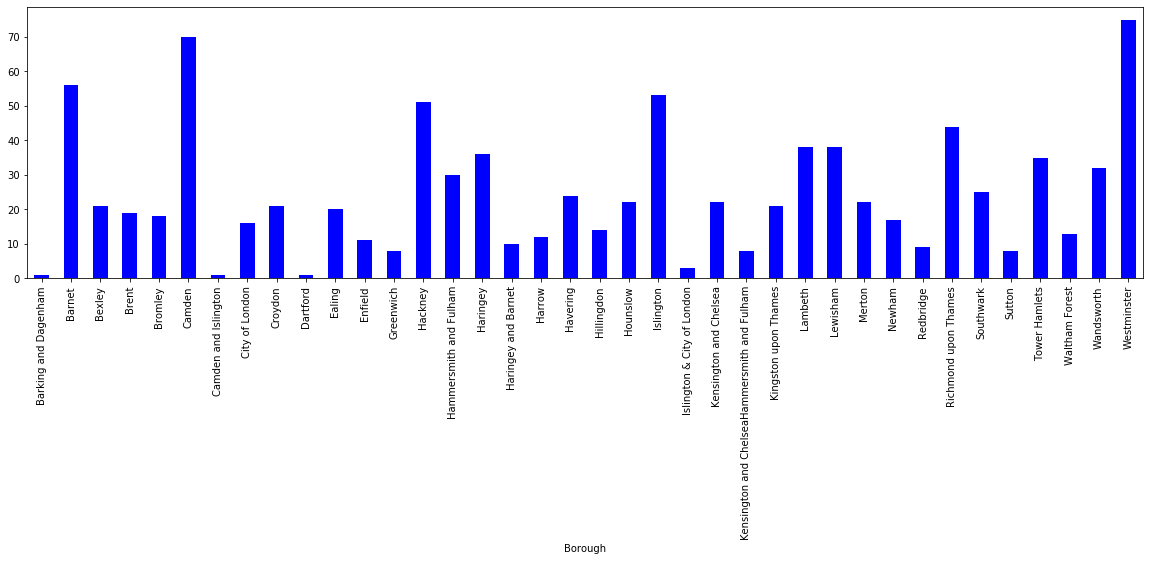

In [8]:
# check how many cafés per borough

london_cafe_df.groupby('Borough')['Venue'].count().plot.bar(figsize=(20,5), color="blue")
plt.title('Cafés per borough: London', fontsize = 16)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('No. cafés',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

<br>
In this project we will direct our efforts on detecting neighborhoods in London that have a reasonable cafés density and that are known with a great coffee culture. <br><br>
Looking at the previous graph, we can see that some boroughs (not even neighborhoods) have a very small number of cafés. We can say that the competition is non-existent in these areas, but since our market is London and we already highlighted the fact that the coffee culture has been booming in the last 10-15 years, these boroughs are not known for good cafés and should not be considered as a good location to open a new café. 
<br><br>

Let's progress with further analysis - for our next step, we will try to identify where customers like to go for a cafés, identify most liked neighborhoods and see which ones may be suitable for our entrepreneur. <br> 
We will use the Foursquare API to get the details of each café in our list. We are mainly interested in the "likes", the "tips" and the "rating". <br><br>


In [26]:
column=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips', 'Venue', 'Venue Latitude', 'Venue Longitude']
cafe_stats_london=pd.DataFrame(columns=column)
count=1

for row in london_cafe_df.values.tolist():
    Borough, Neighborhood, Neighborhood_Latitude, Neighborhood_Longitude, ID, Venue, Venue_Latitude, Venue_Longitude, Venue_Category=row
    try:
        venue_details = get_venue_details(ID)
        id,name,likes,rating,tips = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these cafés as they may have been recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(london_cafe_df),')','processed')
    cafe_stats_london = cafe_stats_london.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood, 
                                            'ID': id,
                                            'Venue' : name,
                                            'Likes' : likes,
                                            'Rating' : rating,
                                            'Tips' : tips,
                                            'Venue Latitude' : Venue_Latitude,
                                            'Venue Longitude' : Venue_Longitude
                                                }, ignore_index=True)
    count+=1

print(cafe_stats_london.shape)
cafe_stats_london.head(20)

( 1 / 425 ) processed
( 2 / 425 ) processed
( 3 / 425 ) processed
( 4 / 425 ) processed
( 5 / 425 ) processed
( 6 / 425 ) processed
( 7 / 425 ) processed
( 8 / 425 ) processed
( 9 / 425 ) processed
( 10 / 425 ) processed
( 11 / 425 ) processed
( 12 / 425 ) processed
( 13 / 425 ) processed
No data available for id= 5217d90611d2eda63cd99981
( 14 / 425 ) processed
( 15 / 425 ) processed
( 16 / 425 ) processed
( 17 / 425 ) processed
( 18 / 425 ) processed
( 19 / 425 ) processed
( 20 / 425 ) processed
( 21 / 425 ) processed
( 22 / 425 ) processed
( 23 / 425 ) processed
( 24 / 425 ) processed
( 25 / 425 ) processed
( 26 / 425 ) processed
No data available for id= 4f8d6437e4b013d9a5231f1c
( 27 / 425 ) processed
No data available for id= 4b49cd87f964a520d97326e3
( 28 / 425 ) processed
No data available for id= 4e01ea57d22db37fb0298ae6
( 29 / 425 ) processed
( 30 / 425 ) processed
( 31 / 425 ) processed
( 32 / 425 ) processed
( 33 / 425 ) processed
( 34 / 425 ) processed
No data available for i

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,Venue,Venue Latitude,Venue Longitude
0,Kingston upon Thames,Kingston upon Thames,4b6be6b0f964a520f51b2ce3,NaN,37,7.0,10,Costa Coffee,51.411664,-0.304736
1,Kingston upon Thames,Kingston upon Thames,4b7be82df964a52026732fe3,NaN,94,7.2,14,Starbucks,51.410867,-0.301778
2,Kingston upon Thames,Kingston upon Thames,51af1a17498e9b28860483f5,NaN,4,6.7,1,Costa Coffee,51.411644,-0.304514
3,Kingston upon Thames,Kingston upon Thames,4ef077bdf9ab3edffbca122e,NaN,1,6.5,1,M&S Café Revive,51.410849,-0.303804
4,Kingston upon Thames,Kingston upon Thames,4b9516a4f964a520948e34e3,NaN,17,6.4,10,Caffè Nero,51.409690,-0.304033
5,Kingston upon Thames,Kingston upon Thames,54c10f68498e7fe1b568e459,NaN,2,5.9,1,Costa Coffee,51.409649,-0.306561
6,Westminster,Knightsbridge,5641abb038fa7b01648ae33e,NaN,492,9.3,120,Carpo,51.498949,-0.165498
7,Westminster,Knightsbridge,5cc1aea3a5a315002cff98f6,NaN,11,8.3,5,39 Steps Coffee Haus,51.498929,-0.165391
8,Westminster,Knightsbridge,52d71ac611d2dae852a0be1f,NaN,1001,8.5,263,Chapati & Karak,51.498400,-0.165931
9,Westminster,Knightsbridge,5a19c873356b4976e646ed4b,NaN,158,8.8,36,The Coffee Bar,51.499171,-0.162803


In [39]:
# Remove rows with a Venue that is "0".
cafe_stats_london.drop(cafe_stats_london[cafe_stats_london['ID']=="0"].index,axis=0, inplace=True)

print(cafe_stats_london.shape)
cafe_stats_london.head(20)

(744, 10)


,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,Venue,Venue Latitude,Venue Longitude
0,Ealing,Acton,517d323fe4b0b4d24c007345,NaN,14,6.4,3,Costa Coffee,51.506879,-0.269368
2,Croydon,Addiscombe,533fea17498e1f39b6eab646,NaN,12,7.9,2,The Tram Stop,51.380188,-0.073378
3,City of London,Aldgate,4f70a772e4b0f375fc669005,NaN,277,9.0,89,The Association,51.513733,-0.079132
4,City of London,Aldgate,4cb1d779562d224b09ec2188,NaN,32,8.1,18,Fazenda,51.516169,-0.077414
5,City of London,Aldgate,59f97d45acb00b6e13f7d430,NaN,12,7.7,2,Black Sheep Coffee,51.513990,-0.075459
6,City of London,Aldgate,58af36849435a903b9148728,NaN,8,7.4,2,Whitechapel Grind,51.514409,-0.072834
7,City of London,Aldgate,56bd9566498e17276fd1943c,NaN,23,7.8,7,Nude Espresso,51.516894,-0.075482
8,City of London,Aldgate,5548bf3e498e5a453a75bb45,NaN,40,7.5,11,Black Sheep Coffee,51.515066,-0.072126
9,City of London,Aldgate,56cf0e4c498e3a5a5e7326c3,NaN,18,8.0,1,Notes Coffee Roaster & Wine Bar,51.514643,-0.080671
10,City of London,Aldgate,520e158a11d25f11387631f8,NaN,10,6.9,5,Peter's Cafe,51.514076,-0.075482


In [79]:
# Save the information so far to a .csv file due to limited calls on FourSquare
#cafe_stats_london.to_csv('cafe_stats_london_final.csv')
cafe_stats_london = pd.read_csv('cafe_stats_london_final.csv')
cafe_stats_london.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name,Likes,Rating,Tips,Venue,Venue Latitude,Venue Longitude
0,0,Ealing,Acton,517d323fe4b0b4d24c007345,NaN,14,6.4,3,Costa Coffee,51.506879,-0.269368
1,2,Croydon,Addiscombe,533fea17498e1f39b6eab646,NaN,12,7.9,2,The Tram Stop,51.380188,-0.073378
2,3,City of London,Aldgate,4f70a772e4b0f375fc669005,NaN,277,9.0,89,The Association,51.513733,-0.079132
3,4,City of London,Aldgate,4cb1d779562d224b09ec2188,NaN,32,8.1,18,Fazenda,51.516169,-0.077414
4,5,City of London,Aldgate,59f97d45acb00b6e13f7d430,NaN,12,7.7,2,Black Sheep Coffee,51.513990,-0.075459


<br> We ended up with 744 cafés in total, which a good number to progress with our analysis. <br>
<br>
Now we will focus on the neighborhoods and their cafés, and see which ones will meet our requirements to be considered as a good location and appreciated by potential customers. <br>
We will first look at check the overall rating of cafés per neighborhood and borough, which will already allow us to have a first idea. We will then reduce our list by focusing only on neighborhoods with high rating. <br><br>


In [10]:
# converting the Likes and Tips to float
cafe_stats_london['Likes']=cafe_stats_london['Likes'].astype('float64')
cafe_stats_london['Tips']=cafe_stats_london['Tips'].astype('float64')
cafe_stats_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    int64  
 1   Borough          744 non-null    object 
 2   Neighborhood     744 non-null    object 
 3   ID               744 non-null    object 
 4   Name             0 non-null      float64
 5   Likes            744 non-null    float64
 6   Rating           744 non-null    float64
 7   Tips             744 non-null    float64
 8   Venue            744 non-null    object 
 9   Venue Latitude   744 non-null    float64
 10  Venue Longitude  744 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 64.1+ KB


In [13]:
# get the average rating of cafés in each borough
cafe_borough=cafe_stats_london.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
cafe_borough.columns=['Borough','Average Rating']
cafe_borough.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Average Rating
6,Camden and Islington,8.500000
22,Islington & City of London,8.333333
23,Kensington and Chelsea,7.890909
34,Tower Hamlets,7.879310
13,Hackney,7.800000
7,City of London,7.743750
37,Westminster,7.555385
21,Islington,7.517391
5,Camden,7.455385
36,Wandsworth,7.341379


In [85]:
# get the average rating of cafés in each neighborhood
cafe_neighborhood=cafe_stats_london.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
cafe_neighborhood.columns=['Neighborhood','Average Rating']
cafe_neighborhood.sort_values(['Average Rating'],ascending=False).head(20)

,Neighborhood,Average Rating
142,Limehouse,9.100000
25,Brixton,9.100000
124,Homerton,9.000000
67,Deptford,8.900000
154,Nag's Head,8.850000
234,West Green,8.700000
22,Bowes Park,8.700000
14,Belsize Park,8.600000
63,Dalston,8.600000
170,Pentonville,8.600000


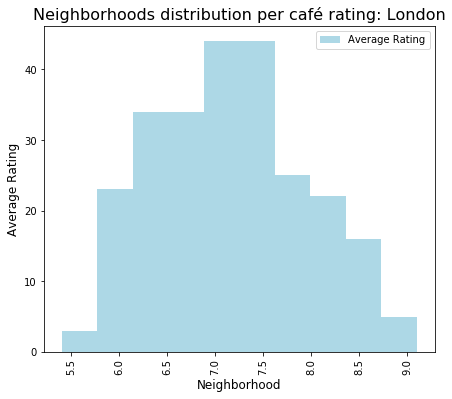

In [83]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

cafe_neighborhood.plot.hist(figsize=(7,6), color="lightblue")
plt.title('Neighborhoods distribution per café rating: London', fontsize = 16)
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('Average Rating',fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

<br>We would like to open our café in a neighborhood where cafés have a good rating - for this project, we decided to focus on the neighborhood with rating equal to or greater than 8.<br>
We will visually map the neighborhoods with an average rating equal to or greater than 8, which will give us a better idea on our current results.<br><br>

In [46]:
cafe_neighborhood=cafe_neighborhood[cafe_neighborhood['Average Rating']>=8.0]
cafe_neighborhood=pd.merge(cafe_neighborhood,london_df, on='Neighborhood')
cafe_neighborhood=cafe_neighborhood[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

# sorting the neighborhoods by average rating, in a descending way.
cafe_neighborhood.sort_values(by='Average Rating', ascending=False, inplace=True)

# add the column number of venues per neighborhood
c_df = london_cafe_df[["Neighborhood", "Venue"]].copy()
count_df = c_df.groupby('Neighborhood')['Venue'].count()
london_cafe_df = london_cafe_df.merge(count_df, on='Neighborhood', how='left')

print(cafe_neighborhood.shape)
cafe_neighborhood

(43, 5)


,Borough,Neighborhood,Latitude,Longitude,Average Rating
5,Lambeth,Brixton,51.456804,-0.116796,9.100000
28,Tower Hamlets,Limehouse,51.513307,-0.035149,9.100000
23,Hackney,Homerton,51.547079,-0.043121,9.000000
16,Lewisham,Deptford,51.475845,-0.021516,8.900000
31,Islington,Nag's Head,51.512979,-0.123620,8.850000
42,Haringey,West Green,51.586806,-0.089849,8.700000
4,Haringey,Bowes Park,51.607186,-0.120485,8.700000
33,Islington,Pentonville,51.531858,-0.108423,8.600000
15,Hackney,Dalston,51.543402,-0.067229,8.600000
11,Kensington and Chelsea,Chelsea,51.487542,-0.168220,8.600000


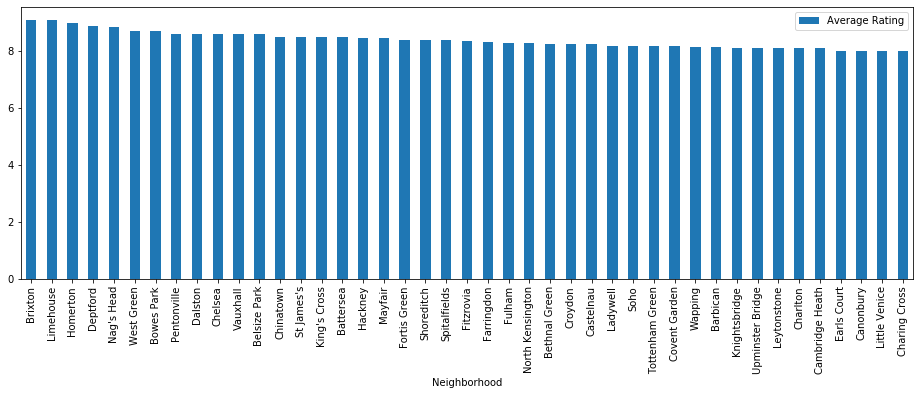

In [55]:
ax = cafe_neighborhood.plot.bar(x='Neighborhood', y='Average Rating', figsize=(16,5), rot='vertical')

<br> We got 43 potential good neighborhoods. Let's visualize them in London map. <br>

In [56]:
import folium
import seaborn as sns
from geopy.geocoders import Nominatim 

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

# create London map and display it
london_map = folium.Map(location=geo_location('London'), zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhoods
for lat, lng, in cafe_neighborhood[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
    
cafe_neighborhood['Label']=cafe_neighborhood['Neighborhood']+', '+cafe_neighborhood['Borough']+'('+cafe_neighborhood['Average Rating'].map(str)+')'

# add pop-up text to each marker on the map
for lat, lng, label in cafe_neighborhood[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(london_map)        

    # add incidents to map
london_map.add_child(incidents)

<br> To reduce further our list of potential good neighborhoods, we will now consider that number of cafés per neighborhood. <br><br>
A good location will be a place known for its good coffee (high rating). To make sure that this rating is relevant, we will expect that the neighborhood should have at least 3 or more cafés already. <br>
Let's drop the ones with 1 or 2 coffee shops.

In [57]:
# add the column number of venues per neighborhood
total = london_cafe_df.groupby(['Neighborhood'])['Venue_x'].count().reset_index(name="Number of Venue")

cafe_neighborhood = cafe_neighborhood.merge(total, on='Neighborhood', how='left')

print(cafe_neighborhood.shape)
cafe_neighborhood

(43, 7)


,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label,Number of Venue
0,Lambeth,Brixton,51.456804,-0.116796,9.100000,"Brixton, Lambeth(9.1)",1
1,Tower Hamlets,Limehouse,51.513307,-0.035149,9.100000,"Limehouse, Tower Hamlets(9.1)",2
2,Hackney,Homerton,51.547079,-0.043121,9.000000,"Homerton, Hackney(9.0)",1
3,Lewisham,Deptford,51.475845,-0.021516,8.900000,"Deptford, Lewisham(8.9)",1
4,Islington,Nag's Head,51.512979,-0.123620,8.850000,"Nag's Head, Islington(8.85)",2
5,Haringey,West Green,51.586806,-0.089849,8.700000,"West Green, Haringey(8.7)",1
6,Haringey,Bowes Park,51.607186,-0.120485,8.700000,"Bowes Park, Haringey(8.7)",2
7,Islington,Pentonville,51.531858,-0.108423,8.600000,"Pentonville, Islington(8.6)",2
8,Hackney,Dalston,51.543402,-0.067229,8.600000,"Dalston, Hackney(8.6)",1
9,Kensington and Chelsea,Chelsea,51.487542,-0.168220,8.600000,"Chelsea, Kensington and Chelsea(8.6)",2


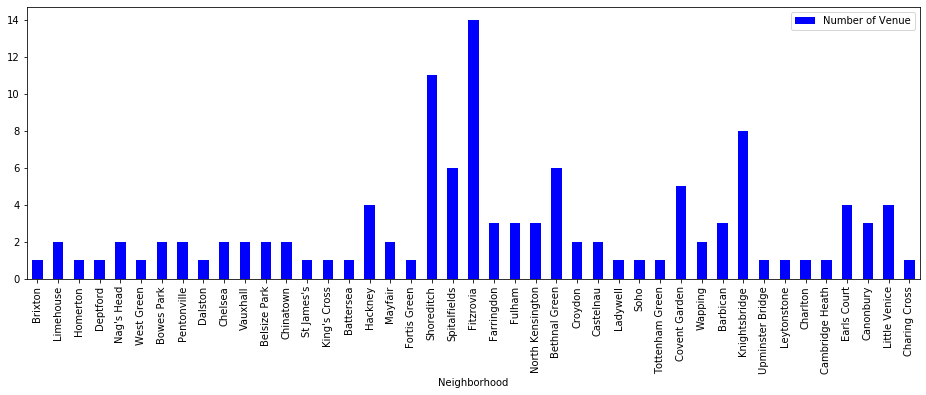

In [64]:
ax = cafe_neighborhood.plot.bar(x='Neighborhood', y='Number of Venue', figsize=(16,5), rot='vertical', color='blue')

In [73]:
#let's consider only the neighborhood with at least cafés - so data can be more accurate
cafe_neighborhood2 = cafe_neighborhood.loc[(cafe_neighborhood['Number of Venue']>2) & (cafe_neighborhood['Number of Venue']<=6)]
cafe_neighborhood2

,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label,Number of Venue
16,Hackney,Hackney,51.543240,-0.049362,8.466667,"Hackney, Hackney(8.466666666666667)",4
20,Tower Hamlets,Spitalfields,51.519527,-0.075170,8.383333,"Spitalfields, Tower Hamlets(8.383333333333333)",6
22,Islington & City of London,Farringdon,51.520124,-0.104793,8.333333,"Farringdon, Islington & City of London(8.33333...",3
23,Hammersmith and Fulham,Fulham,51.474422,-0.206077,8.300000,"Fulham, Hammersmith and Fulham(8.3)",3
24,Kensington and Chelsea,North Kensington,51.519665,-0.210696,8.300000,"North Kensington, Kensington and Chelsea(8.299...",3
25,Tower Hamlets,Bethnal Green,51.530346,-0.056163,8.266667,"Bethnal Green, Tower Hamlets(8.266666666666667)",6
31,Westminster,Covent Garden,51.512874,-0.122544,8.180000,"Covent Garden, Westminster(8.18)",5
33,City of London,Barbican,51.520150,-0.098683,8.133333,"Barbican, City of London(8.133333333333335)",3
39,Kensington and Chelsea,Earls Court,51.491612,-0.193903,8.000000,"Earls Court, Kensington and Chelsea(8.0)",4
40,Islington,Canonbury,51.543036,-0.095401,8.000000,"Canonbury, Islington(8.0)",3


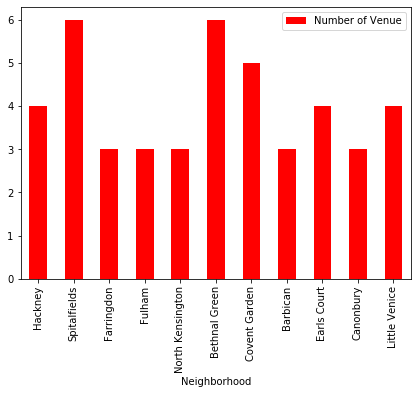

In [75]:
ax = cafe_neighborhood2.plot.bar(x='Neighborhood', y='Number of Venue', figsize=(7,5), rot='vertical', color='red')

In [76]:
for lat, lng, in cafe_neighborhood2[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    
cafe_neighborhood2['Label']=cafe_neighborhood2['Neighborhood']+', '+cafe_neighborhood2['Borough']+'('+cafe_neighborhood2['Average Rating'].map(str)+')'

# add pop-up text to each marker on the map
for lat, lng, label in cafe_neighborhood2[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(london_map)        

    # add incidents to map
london_map.add_child(incidents)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<br>
This looks so much better. Let's analyze these results and propose the best three locations to open a new café in London.<br><br><br>

### <b>Results and discussion section</b><br>
<br>
Our analysis shows that although there is a great number of cafés in London (around 800 in 500 neighborhoods), there are few locations with acceptable density, close to city center and very appreciated for their coffee cultures. <br><br>
The highest concentration of cafés was detected in Camden and Westminster, which are touristic areas and neighborhoods known by a high density of people. We tried to avoid these neighborhoods, since the competition is already strong there and they probably have faithful customers not willing to change their habits. <br>
We still were looking at popular areas that offer a combination of popularity among tourists/locals, closeness to city center and a strong socio-economic dynamics (close to business areas like Canary Wharf).<br>
After that, we had to start looking at the neighborhoods with a reasonable (fairly low) number of open cafés, but on the other hand eliminated the ones with only 1 or 2 cafés - considered as not good locations, since not known for their strong coffee culture. <br><br>

Result of all this is 14 neighborhoods representing potential locations. This, of course, does not clearly solve our problem, since we still need to reduce that number and identify the best three locations for a new café. <br><br>
Recommended locations should meet past conditions, but also be more selective. First, we should only focus on neighborhoods with less than 8 open cafés already, and Second, a good density of people - and that's where we will use our dataframe detailing the number of population by borough. <br><br>
Based on that, the best three neighborhoods, with small competition, close to city center, known by a good coffee culture and have a good population density are: <br>
1- Hackney  <br>
2- Spitalfields<br>
3- Farringdon<br>
<br>
<br>

### <b>Conclusion section</b><br>
<br>
The purpose of this project was to identify London neighborhoods close to center with low number of cafés, in order to aid entrepreneurs in narrowing down the search for optimal locations for their new coffee shop. By calculating the café density and average rating per neighborhood/borough using Foursquare API/data, we first identified around 50 neighborhoods that can be considered for further analysis. Then we started looking at the competition and the population (which can be translated to potential future customers).<br><br>
To have good chances of success, it is recommended to open a new café in Hackney neighborhood. There are only 4 other cafés already open, with an average rating of 8.46 on a scale from 1.0 to 10.00 (considered very high comparing to other areas) and with a decent population (around 300000 people).<br>
To not limit the choice to one neighborhood, we also recommended Spitalfields and Farringdon as the 2nd and 3rd best locations to open a café. This will offer a better flexibility for the entrepreneurs knowing that it's not easy to find a shop to rent or buy in city center. <br><br>
As a final note, these results can be further developed by doing similar analysis by streets (focusing on the three proposed areas) and also consider the real estate situation (the availability of a shop, how much renting will cost, etc...) which will increase the chance to build a sustainable and lucrative coffee business. This will require a different datasets.